In [1]:
import xarray as xr
import rioxarray as rxr
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Product ID

In [2]:
product_dir = list(Path('.').glob('ALOS2-GUNW-*'))[0]
prod_id = product_dir.name
prod_id

'ALOS2-GUNW-D-153-20150412-20150301-182629-18N-100W-v1_0_0'

# Paths

In [3]:
geo_paths = list(Path('insar').glob('*.geo'))
geo_paths

[PosixPath('insar/filt_150412-150301_30rlks_168alks.unw.geo'),
 PosixPath('insar/150412-150301_30rlks_168alks.ion.geo'),
 PosixPath('insar/filt_150412-150301_30rlks_168alks.int.geo'),
 PosixPath('insar/filt_150412-150301_30rlks_168alks.unw.conncomp.geo'),
 PosixPath('insar/150412-150301_30rlks_168alks.cor.geo'),
 PosixPath('insar/150412-150301_30rlks_168alks.los.geo'),
 PosixPath('insar/150412-150301_30rlks_168alks.phsig.geo')]

In [4]:
vrt_paths = list(Path('insar').glob('*.vrt'))
vrt_paths

[PosixPath('insar/filt_150412-150301_30rlks_168alks_msk.unw.vrt'),
 PosixPath('insar/filt_150412-150301_30rlks_168alks.unw.vrt'),
 PosixPath('insar/150412-150301_30rlks_168alks.wbd.vrt'),
 PosixPath('insar/150412-150301_1rlks_14alks.int.vrt'),
 PosixPath('insar/diff_150412-150301_30rlks_168alks.int.vrt'),
 PosixPath('insar/diff_150412-150301_1rlks_14alks.int.vrt'),
 PosixPath('insar/150412-150301_1rlks_14alks.lat.vrt'),
 PosixPath('insar/filt_150412-150301_30rlks_168alks.int.geo.vrt'),
 PosixPath('insar/150412-150301_30rlks_168alks.hgt.vrt'),
 PosixPath('insar/150412-150301_1rlks_14alks_az.off.vrt'),
 PosixPath('insar/150412-150301_1rlks_14alks.wbd.vrt'),
 PosixPath('insar/filt_150412-150301_30rlks_168alks.int.vrt'),
 PosixPath('insar/150412-150301_30rlks_168alks.lat.vrt'),
 PosixPath('insar/filt_150412-150301_30rlks_168alks.unw.geo.vrt'),
 PosixPath('insar/150412-150301_1rlks_14alks.hgt.vrt'),
 PosixPath('insar/150412-150301_30rlks_168alks.ion.vrt'),
 PosixPath('insar/150412-150301_1r

In [5]:
p = Path('insar')
isce_prod_paths = {'coherence': list(p.glob('*cor.geo'))[0],
                   'ionosphere': list(p.glob('*ion.geo'))[0],
                   'connectedComponents': list(p.glob('*conncomp.geo'))[0],
                   'unwrappedPhase': list(p.glob('*unw.geo'))[0],
                   'amplitude': list(p.glob('*amp'))[0],
                   'line_of_sight': list(p.glob('*los.geo'))[0],
                   'interferogram': list(p.glob('*.int.geo'))[0],
                   }
isce_prod_paths

{'coherence': PosixPath('insar/150412-150301_30rlks_168alks.cor.geo'),
 'ionosphere': PosixPath('insar/150412-150301_30rlks_168alks.ion.geo'),
 'connectedComponents': PosixPath('insar/filt_150412-150301_30rlks_168alks.unw.conncomp.geo'),
 'unwrappedPhase': PosixPath('insar/filt_150412-150301_30rlks_168alks.unw.geo'),
 'amplitude': PosixPath('insar/150412-150301_1rlks_14alks.amp'),
 'line_of_sight': PosixPath('insar/150412-150301_30rlks_168alks.los.geo'),
 'interferogram': PosixPath('insar/filt_150412-150301_30rlks_168alks.int.geo')}

# Writing to Group `science/grids/data`

In [6]:
coh = rxr.open_rasterio(isce_prod_paths['coherence']).sel(band=2)
coh = coh.assign_coords(dict(band=1))
coh = coh.where(coh!=0, drop=True)
coh = coh.astype(np.float32)
coh.attrs.update({'standard_name': 'coherence',
                  'units': 'unitless'})
coh

<xarray.DataArray (y: 4497, x: 4741)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int64 1
  * y            (y) float64 21.83 21.83 21.83 21.83 ... 18.09 18.09 18.09 18.09
  * x            (x) float64 -100.1 -100.1 -100.1 ... -96.19 -96.19 -96.19
    spatial_ref  int64 0
Attributes:
    scale_factor:   1.0
    add_offset:     0.0
    grid_mapping:   spatial_ref
    standard_name:  coherence
    units:          unitless

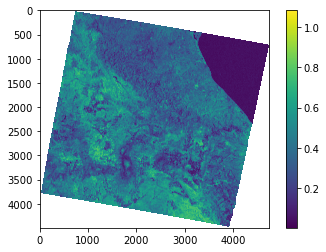

In [7]:
plt.imshow(coh.data)
plt.colorbar()

In [8]:
unw =  rxr.open_rasterio(isce_prod_paths['unwrappedPhase']).sel(band=2)
unw = unw.assign_coords(dict(band=1))
unw = unw.where(unw!=0, drop=True)
unw.attrs.update({'standard_name': 'unwrappedPhase',
                  'units': 'unitless'})
unw

<xarray.DataArray (y: 4497, x: 4394)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int64 1
  * y            (y) float64 21.83 21.83 21.83 21.83 ... 18.09 18.09 18.09 18.09
  * x            (x) float64 -100.1 -100.1 -100.1 ... -96.48 -96.48 -96.48
    spatial_ref  int64 0
Attributes:
    scale_factor:   1.0
    add_offset:     0.0
    grid_mapping:   spatial_ref
    standard_name:  unwrappedPhase
    units:          unitless

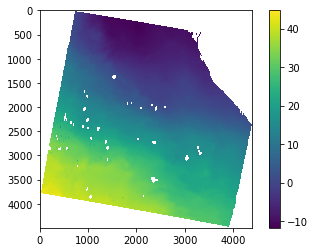

In [9]:
plt.imshow(unw)
plt.colorbar()

In [10]:
ifg =  rxr.open_rasterio(isce_prod_paths['interferogram']).sel(band=1)
amp = xr.apply_ufunc(np.abs, ifg, keep_attrs=True)
amp = amp.where(amp!=0, drop=True)
amp.attrs.update({'standard_name': 'amplitude',
                  'units': 'Watts'})
amp

<xarray.DataArray (y: 4475, x: 4718)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int64 1
  * y            (y) float64 21.83 21.83 21.82 21.82 ... 18.1 18.1 18.1 18.1
  * x            (x) float64 -100.1 -100.1 -100.1 -100.1 ... -96.2 -96.2 -96.2
    spatial_ref  int64 0
Attributes:
    scale_factor:   1.0
    add_offset:     0.0
    grid_mapping:   spatial_ref
    standard_name:  amplitude
    units:          Watts

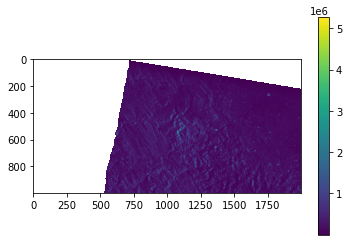

In [11]:
plt.imshow(amp.data[:1_000, :2_000])
plt.colorbar()

In [12]:
ccs =  rxr.open_rasterio(isce_prod_paths['connectedComponents']).sel(band=1)
ccs = ccs.where(ccs!=0, drop=True)
ccs.attrs.update({'standard_name': 'connectedComponents',
                  'units': 'unitless'})
ccs

<xarray.DataArray (y: 4497, x: 4696)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    band         int64 1
  * y            (y) float64 21.83 21.83 21.83 21.83 ... 18.09 18.09 18.09 18.09
  * x            (x) float64 -100.1 -100.1 -100.1 ... -96.23 -96.23 -96.22
    spatial_ref  int64 0
Attributes:
    scale_factor:   1.0
    add_offset:     0.0
    grid_mapping:   spatial_ref
    standard_name:  connectedComponents
    units:          unitless

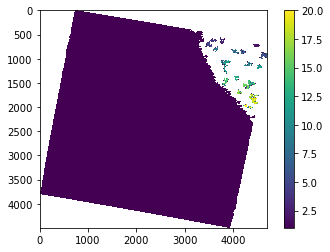

In [13]:
plt.imshow(ccs.data, interpolation='none')
plt.colorbar()

In [14]:
out_path = product_dir/f'{prod_id}.nc'
out_path

PosixPath('ALOS2-GUNW-D-153-20150412-20150301-182629-18N-100W-v1_0_0/ALOS2-GUNW-D-153-20150412-20150301-182629-18N-100W-v1_0_0.nc')

In [15]:
ds = xr.Dataset({'connectedComponent':ccs,
                 'amplitude': amp,
                 'unwrappedPhase': unw,
                 'coherence': coh})


ds = ds.rename({'x': 'longitude', 
                'y':'latitude',
                'spatial_ref': 'crs'
                }
                )

ds.coords['latitude'].attrs.update({'units': 'degrees',
                                    'standard_name': 'latitude',
                                    'long_name': 'latitude'})
ds.coords['longitude'].attrs.update({'units': 'degrees',
                                     'standard_name': 'longitude',
                                     'long_name': 'longitude'})

ds.coords['latitude'] = ds.coords['latitude'].astype(np.float32)
ds.coords['longitude'] = ds.coords['longitude'].astype(np.float32)

compression = dict(zlib=True, complevel=5)
encoding = {var: compression for var in ds.data_vars}

ds.to_netcdf(out_path, 
             group='science/grids/data', 
             mode='w',
             encoding=encoding
             )
ds

<xarray.Dataset>
Dimensions:             (latitude: 4497, longitude: 4741)
Coordinates:
  * latitude            (latitude) float32 18.09 18.09 18.09 ... 21.83 21.83
  * longitude           (longitude) float32 -100.1 -100.1 ... -96.19 -96.19
    band                int64 1
    crs                 int64 0
Data variables:
    connectedComponent  (latitude, longitude) float64 nan nan nan ... nan nan
    amplitude           (latitude, longitude) float32 nan nan nan ... nan nan
    unwrappedPhase      (latitude, longitude) float32 nan nan nan ... nan nan
    coherence           (latitude, longitude) float32 nan nan nan ... nan nan

In [16]:
wkt = ds['crs'].attrs['crs_wkt']
wkt

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

# Bounding box

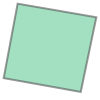

In [17]:
from shapely.geometry import shape
import json

bounds_dict = json.load(open('union.geojson', 'rb'))
bounds = shape(bounds_dict)
bounds

In [18]:
crs_array = xr.DataArray(np.array([-2147483647]),
                         dims=['wkt_count'],
                         attrs={'spatial_ref': wkt,
                                'long_name': 'crs_polygon',
                                'standard_name': 'crs_polygon'})
crs_array

<xarray.DataArray (wkt_count: 1)>
array([-2147483647])
Dimensions without coordinates: wkt_count
Attributes:
    spatial_ref:    GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",637813...
    long_name:      crs_polygon
    standard_name:  crs_polygon

In [21]:
bbox_str = str.encode(f'{str(bounds)}')
boundingBox = xr.DataArray(np.array([bbox_str]),
                           dims=['wkt_count'])
boundingBox

<xarray.DataArray (wkt_count: 1)>
array([b'POLYGON ((-96.17796830232892 21.25951123748013, -96.17730760260231 21.25939696689257, -96.843173553836 18.06898254202612, -100.1369411192918 18.65929018004776, -100.1367505118793 18.66030900005793, -100.1376795302874 18.66047551627056, -99.54225234548686 21.84242172762871, -96.17777138358394 21.26045446113611, -96.17796830232892 21.25951123748013))'],
      dtype='|S350')
Dimensions without coordinates: wkt_count

In [22]:
ds2 = xr.Dataset({'crs': crs_array, 
                  'boundingBox': boundingBox})
ds2

<xarray.Dataset>
Dimensions:      (wkt_count: 1)
Dimensions without coordinates: wkt_count
Data variables:
    crs          (wkt_count) int64 -2147483647
    boundingBox  (wkt_count) |S350 b'POLYGON ((-96.17796830232892 21.25951123...

In [23]:
ds2.to_netcdf(out_path, mode='a')